In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

pd.set_option('display.max_rows', 100)

In [28]:
def look_for_number_of_clusters(scaled_audio_features, max_k=30):
    inertia = []
    silhouette_score_list = []
    

    for k in range(2, max_k):
        k_means = KMeans(n_clusters=k, random_state=123)
        k_means.fit(scaled_audio_features)

        inertia.append(k_means.inertia_)
        silhouette_score_list.append(silhouette_score(scaled_audio_features, k_means.labels_))

    # Plot inertia
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title(f'Inertia evolution from 1 cluster to {max_k} clusters')
    sns.lineplot(x=range(2, max_k), y=inertia)
    sns.scatterplot(x=range(2, max_k), y=inertia)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.savefig('Inertia')
    plt.show()

    # Plot silhouette score
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title(f'Silhouette score evolution from 2 clusters to {max_k} clusters')
    sns.lineplot(x=range(2, max_k), y=silhouette_score_list)
    sns.scatterplot(x=range(2, max_k), y=silhouette_score_list)
    plt.savefig('Silhouette_score')
    plt.show()

def check_number_of_iterations(scaled_audio_features):
    inertia = []
    silhouette_score_list = []
    max_n = 30

    for k in range(10, max_n):
        k_means = KMeans(n_clusters=13, n_init=max_n, random_state=123)
        k_means.fit(scaled_audio_features)

        inertia.append(k_means.inertia_)
        silhouette_score_list.append(silhouette_score(scaled_audio_features, k_means.labels_))

    # Plot inertia
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title(f'Inertia evolution from 10 iterations to {max_n} iterations')
    sns.lineplot(x=range(10, max_n), y=inertia)
    sns.scatterplot(x=range(10, max_n), y=inertia)
    plt.xlabel('Number of iterations')
    plt.ylabel('Inertia')
    plt.savefig('Inertia_vs_iterations')
    plt.show()

    # Plot silhouette score
    plt.title(f'Silhouette score evolution from 10 iterations to {max_n} iterations')
    sns.lineplot(x=range(10, max_n), y=silhouette_score_list)
    sns.scatterplot(x=range(10, max_n), y=silhouette_score_list)
    plt.savefig('Silhouette_score_vs_iterations')
    plt.show()
    
    
def assign_clusters_and_distance_to_centroid(scaled_audio_features, k_means):
    
    dist_cols = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'tempo']
    
    centroids = pd.DataFrame(k_means.cluster_centers_, columns=scaled_audio_features.columns)
    scaled_audio_features['cluster'] = k_means.labels_
        
    scaled_audio_features['dist_to_centroid'] = scaled_audio_features.apply(
        lambda row: distance.euclidean(row[dist_cols], centroids.loc[row.cluster]), 
        axis=1
    )
    
    print('inertia: ', k_means.inertia_)
    print('silhouette_score: ', silhouette_score(scaled_audio_features, k_means.labels_))
    
    return scaled_audio_features

### Load data

In [3]:
# 1. read the csv data into a Pandas DataFrame
df_audio_features = pd.read_csv("../data/spotify/audio_features_5000.csv")

df_audio_features.drop_duplicates(subset='name', inplace=True)

df_audio_features.set_index(["artist", "name"], inplace=True)

'''
columns: 
danceability, energy, key, loudness, mode, speechiness, acousticness, 
instrumentalness, liveness, valence, tempo, time_signature
'''
df_audio_features.drop(['duration_ms', 'speechiness', 'key', 'time_signature', 'loudness', 'liveness', 'mode'], inplace=True, axis=1)

df_audio_features.head()

,,danceability,energy,acousticness,instrumentalness,valence,tempo
artist,name,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.658,0.2590,0.694,0.000059,0.306,110.376
Antônio Carlos Jobim,Saudade De Bahia,0.742,0.3990,0.217,0.000002,0.693,125.039
Martinho Da Vila,"Canta Canta, Minha Gente",0.851,0.7300,0.453,0.000063,0.905,93.698
Chico César,Mulher Eu Sei,0.705,0.0502,0.879,0.000041,0.524,106.802
Kurt Elling,Rosa Morena,0.651,0.1190,0.916,0.000343,0.402,120.941


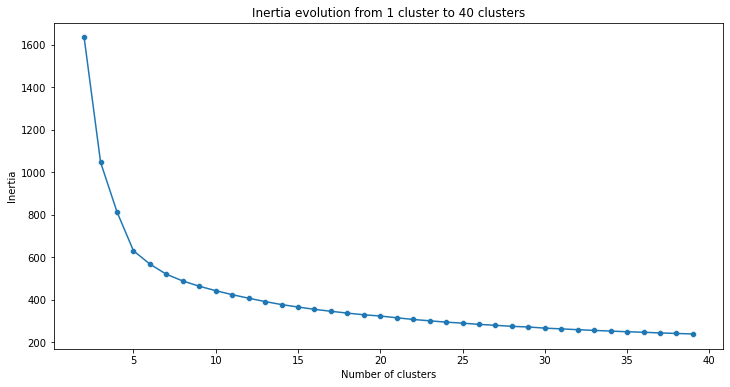

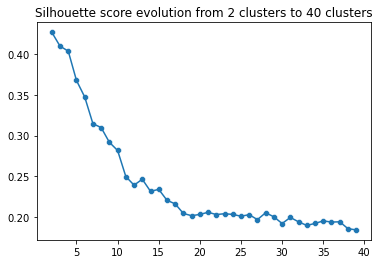

In [5]:
audio_features = df_audio_features.copy()

transformer = MinMaxScaler(feature_range=(0,1))
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

look_for_number_of_clusters(scaled_audio_features)

### Check number of clusters with Quantile transformer

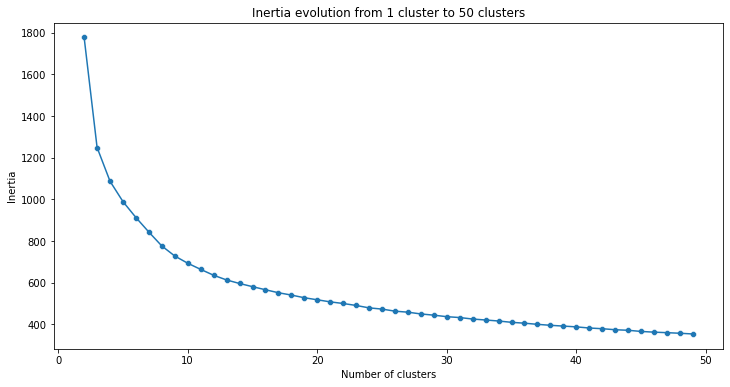

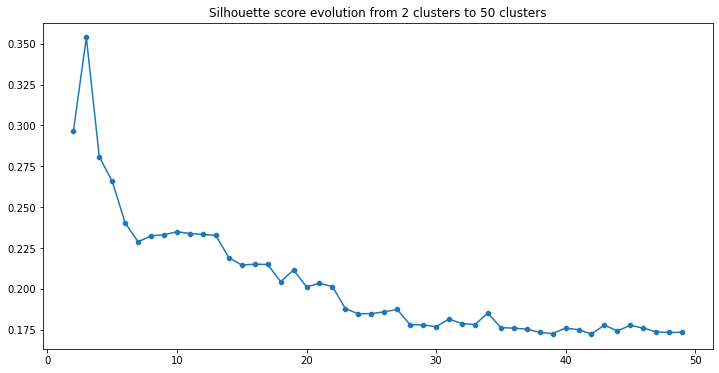

In [29]:
audio_features = df_audio_features.copy()

transformer = QuantileTransformer()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

look_for_number_of_clusters(scaled_audio_features, max_k=50)

### Check number of iterations with Quantile transformer

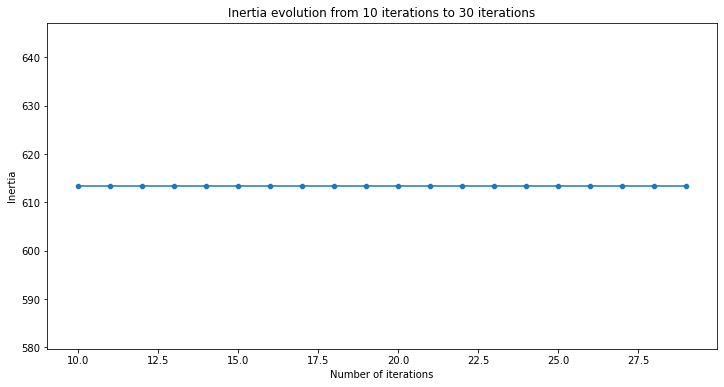

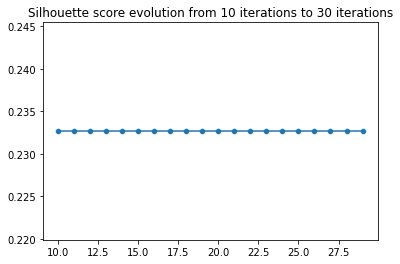

In [49]:
audio_features = df_audio_features.copy()

transformer = QuantileTransformer()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

check_number_of_iterations(scaled_audio_features)

### Examine the clusters

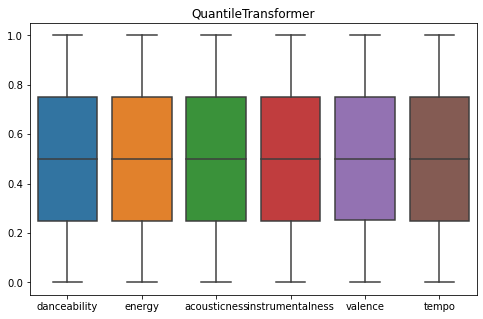

In [4]:
# Transform data
audio_features = df_audio_features.copy()

transformer = QuantileTransformer()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

plt.subplots(figsize=(8, 5))
sns.boxplot(data=scaled_audio_features)
plt.title('QuantileTransformer')
plt.show()

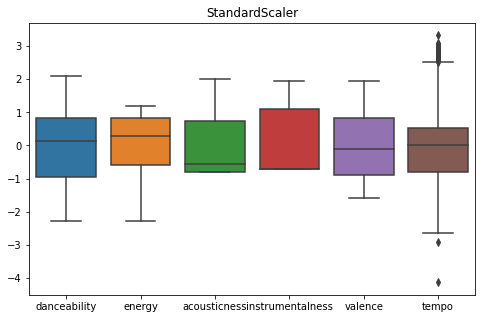

In [45]:
# Transform data
audio_features = df_audio_features.copy()
transformer = StandardScaler()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

plt.subplots(figsize=(8, 5))
sns.boxplot(data=scaled_audio_features)
plt.title('StandardScaler')
plt.savefig('StandardScaler')
plt.show()

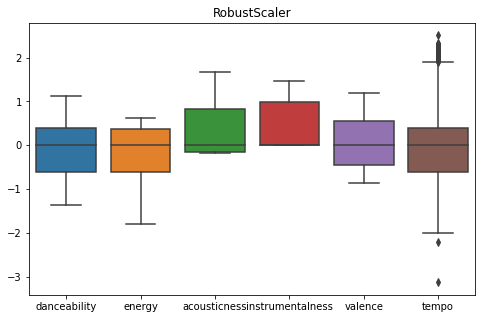

In [46]:
# Transform data
audio_features = df_audio_features.copy()
transformer = RobustScaler()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)

plt.subplots(figsize=(8, 5))
sns.boxplot(data=scaled_audio_features)
plt.title('RobustScaler')
plt.savefig('RobustScaler')
plt.show()

In [27]:
# Transform data
audio_features = df_audio_features.copy()

transformer = QuantileTransformer()
scaled_audio_features = transformer.fit_transform(audio_features)
scaled_audio_features = pd.DataFrame(scaled_audio_features,
                                     index=audio_features.index,
                                     columns=audio_features.columns)
# Check the best values
k_means = KMeans(n_clusters=40, random_state=123)
k_means.fit(scaled_audio_features)

scaled_audio_features = assign_clusters_and_distance_to_centroid(scaled_audio_features, k_means)
scaled_audio_features.head()

inertia:  388.2550882077851
silhouette_score:  0.7030179187290706


,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid
artist,name,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.705205,0.144478,0.796797,0.376235,0.381381,0.412290,29,0.358869
Antônio Carlos Jobim,Saudade De Bahia,0.836837,0.200422,0.612613,0.264656,0.764765,0.596576,30,0.281853
Martinho Da Vila,"Canta Canta, Minha Gente",0.963964,0.481481,0.723661,0.378841,0.941456,0.199067,22,0.237828
Chico César,Mulher Eu Sei,0.780781,0.040883,0.864364,0.364723,0.610611,0.372372,34,0.386957
Kurt Elling,Rosa Morena,0.692192,0.081615,0.882396,0.431433,0.489489,0.533956,21,0.299410


inertia:  613.4403278696283
silhouette_score:  0.6419578148921726


,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid
artist,name,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.705205,0.144478,0.796797,0.376235,0.381381,0.412290,10,0.329433
Antônio Carlos Jobim,Saudade De Bahia,0.836837,0.200422,0.612613,0.264656,0.764765,0.596576,11,0.324549
Martinho Da Vila,"Canta Canta, Minha Gente",0.963964,0.481481,0.723661,0.378841,0.941456,0.199067,8,0.295949
Chico César,Mulher Eu Sei,0.780781,0.040883,0.864364,0.364723,0.610611,0.372372,10,0.369214
Kurt Elling,Rosa Morena,0.692192,0.081615,0.882396,0.431433,0.489489,0.533956,10,0.377520


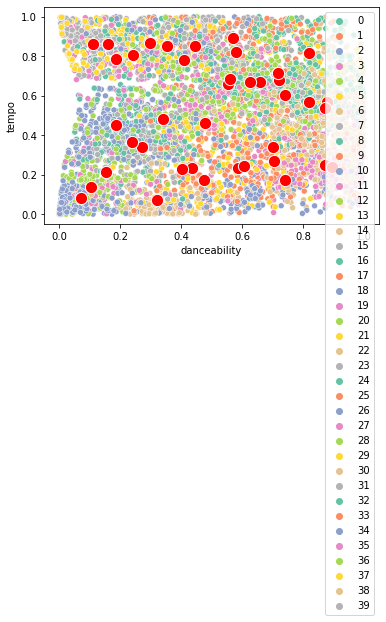

In [22]:
scaled_audio_features['label'] = scaled_audio_features.cluster
# Find centroids
centroids = scaled_audio_features.drop(['dist_to_centroid', 'label'], axis=1).groupby(by="cluster").mean() 
centroids

# Time to plot the data, 'hue' determines which categories to colour by, 'palette' determines the colours used
sns.scatterplot(data=scaled_audio_features, x='danceability', y='tempo', hue='cluster', palette='Set2')#, style='species')
sns.scatterplot(data=centroids, x='danceability', y='tempo', color='red', s=150)
plt.show()

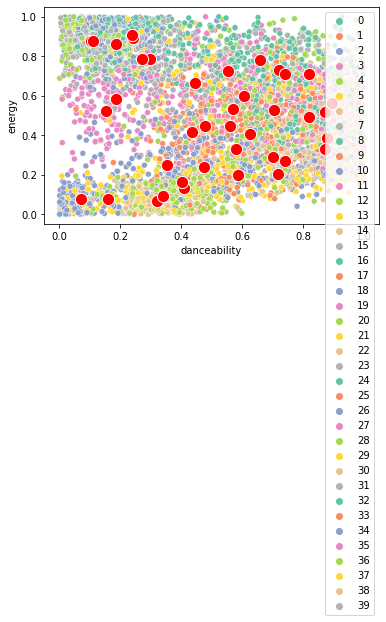

In [23]:
sns.scatterplot(data=scaled_audio_features, x='danceability', y='energy', hue='cluster', palette='Set2')#, style='species')
sns.scatterplot(data=centroids, x='danceability', y='energy', color='red', s=150)
plt.show()

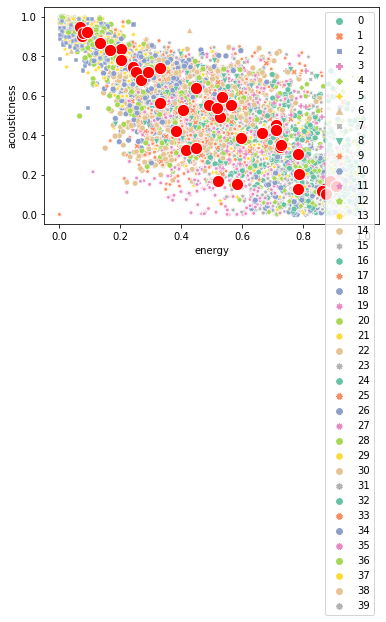

In [24]:
sns.scatterplot(data=scaled_audio_features, x='energy', y='acousticness', hue='label', palette='Set2', style='label')
sns.scatterplot(data=centroids, x='energy', y='acousticness', color='red', s=150)

plt.show()

In [7]:
# Assign a label column
scaled_audio_features['label'] = scaled_audio_features.cluster


labels = {
    0:'classical/chill',
    1:'rap/pop',
    2:'electronic',
    5:'pop',
    6:'classical/chill',
    7:'death metal',
    8:'latin/pop',
    9:'pop',
    10:'jazz/blues/soul',
    11:'80s',
    12:'death metal',
}
for cluster, genre in labels.items():
    print(cluster, genre)
    scaled_audio_features.label[scaled_audio_features.label==cluster] = genre
scaled_audio_features

0 classical/chill
1 rap/pop
2 electronic
5 pop
6 classical/chill
7 death metal
8 latin/pop
9 pop
10 jazz/blues/soul
11 80s
12 death metal


/tmp/ipykernel_1003381/75049123.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_audio_features.label[scaled_audio_features.label==cluster] = genre


,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid,label
artist,name,,,,,,,,,
Gilberto Gil,Se Eu Quiser Falar Com Deus,0.705205,0.144478,0.796797,0.376235,0.381381,0.412290,10,0.329433,jazz/blues/soul
Antônio Carlos Jobim,Saudade De Bahia,0.836837,0.200422,0.612613,0.264656,0.764765,0.596576,11,0.324549,80s
Martinho Da Vila,"Canta Canta, Minha Gente",0.963964,0.481481,0.723661,0.378841,0.941456,0.199067,8,0.295949,latin/pop
Chico César,Mulher Eu Sei,0.780781,0.040883,0.864364,0.364723,0.610611,0.372372,10,0.369214,jazz/blues/soul
Kurt Elling,Rosa Morena,0.692192,0.081615,0.882396,0.431433,0.489489,0.533956,10,0.377520,jazz/blues/soul
...,...,...,...,...,...,...,...,...,...,...
Pyotr Ilyich Tchaikovsky,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.099099,0.053265,0.882934,0.761428,0.082999,0.139828,6,0.124336,classical/chill
Tristan Murail,"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.081081,0.073073,0.852647,0.703148,0.016016,0.108958,6,0.205890,classical/chill
Arnold Schoenberg,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.000947,0.000951,0.908909,0.997998,0.011011,0.025966,6,0.293069,classical/chill


In [8]:
scaled_audio_features[scaled_audio_features.label=='pop']

,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid,label
artist,name,,,,,,,,,
Chico César,A Força Que Nunca Seca (feat. Maria Bethânia),0.547548,0.078596,0.870121,0.000000,0.388388,0.387714,5,0.346591,pop
Sonny Rollins,Don't Stop the Carnival,0.437437,0.275776,0.756757,0.000000,0.877878,0.346222,5,0.399300,pop
João Gilberto,"Brigas, Nunca Mais",0.456456,0.137137,0.799466,0.000000,0.799800,0.104729,5,0.394150,pop
Bïa,Mariana,0.947948,0.214214,0.738919,0.000000,0.875876,0.799971,9,0.439212,pop
Wilson Simonal,País Tropical,0.785953,0.334892,0.796296,0.000000,0.948448,0.695684,9,0.354462,pop
...,...,...,...,...,...,...,...,...,...,...
Tasha Cobbs Leonard,I'm Getting Ready,0.393393,0.368368,0.312312,0.000000,0.339840,0.198257,5,0.438232,pop
Tamela Mann,Take Me to the King (feat. Kirk Franklin),0.416416,0.207290,0.597598,0.271522,0.435435,0.466666,5,0.362051,pop
Lexi,In The Room,0.529530,0.385385,0.765766,0.000000,0.225726,0.342872,5,0.325523,pop


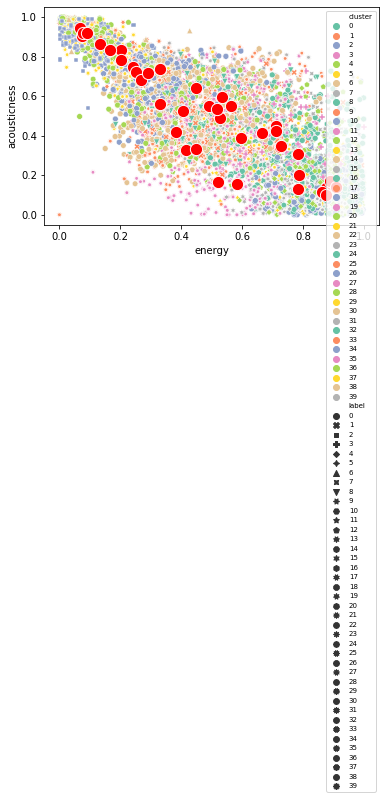

NameError: name 'spotify' is not defined

In [25]:
centroids = scaled_audio_features.drop(['dist_to_centroid', 'label'], axis=1).groupby(by="cluster").mean() 
centroids

sns.scatterplot(data=scaled_audio_features, x='energy', y='acousticness', hue='cluster', palette='Set2', style='label')
sns.scatterplot(data=centroids, x='energy', y='acousticness', color='red', s=150)

plt.legend(prop={'size': 7})
plt.savefig('centroids')
plt.show()

In [78]:
cluster_num = 2
scaled_audio_features.label[scaled_audio_features.label==cluster_num] = 'Chill vibes'
print(scaled_audio_features[scaled_audio_features.cluster==cluster_num].shape)
scaled_audio_features[scaled_audio_features.cluster==cluster_num].sort_values('dist_to_centroid').head(30)

(345, 9)


/tmp/ipykernel_999389/2793800227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_audio_features.label[scaled_audio_features.label==cluster_num] = 'Chill vibes'


,,danceability,energy,acousticness,instrumentalness,valence,tempo,cluster,dist_to_centroid,label
artist,name,,,,,,,,,
Eric Prydz,Generate,0.671672,0.705205,0.307271,0.610336,0.261261,0.630953,2,0.141700,Chill vibes
Nause,Hungry Hearts - Radio Edit,0.692192,0.611612,0.319319,0.528464,0.462462,0.646979,2,0.144616,Chill vibes
Sander van Doorn,Gold Skies,0.542543,0.633634,0.276936,0.621525,0.279279,0.664123,2,0.153436,Chill vibes
Martin Garrix,Don't Look Down (feat. Usher),0.575576,0.624124,0.267070,0.452232,0.429429,0.662663,2,0.161611,Chill vibes
Example,Changed The Way You Kiss Me - Radio Edit,0.546046,0.599099,0.308050,0.424477,0.272272,0.631941,2,0.165367,Chill vibes
U96,Das Boot,0.669169,0.731231,0.345345,0.611647,0.431431,0.557558,2,0.170914,Chill vibes
Hardwell,Apollo - Radio Edit,0.542543,0.497998,0.341341,0.559560,0.342843,0.680153,2,0.171446,Chill vibes
Daddy's Groove,Stellar,0.531031,0.651652,0.344874,0.425205,0.393958,0.661662,2,0.176803,Chill vibes
Dimitri Vangelis & Wyman,Payback,0.667167,0.622623,0.432203,0.632633,0.420420,0.673327,2,0.178305,Chill vibes


In [38]:
scaled_audio_features[scaled_audio_features.label=='Death Metal'].sort_values('dist_to_centroid').head(30).index.get_level_values('artist').drop_duplicates().tolist()


Opeth
Agressor
Massacre
Seance
Asphyx
Cryptopsy
Monstrosity
Malevolentreation
Mortification
Shubiggurath
Cemetary
Edge of Sanity
Naphobia
Death
Altar
Carcass
Extreme Noise Terror
Pestilence
Sacrificium
Xysma
Extol
Brutality
Autopsy
Necrophobic

['Opeth',
 'Agressor',
 'Massacre',
 'Seance',
 'Asphyx',
 'Cryptopsy',
 'Monstrosity',
 'Malevolent Creation',
 'Mortification',
 'Shub Niggurath',
 'Cemetary',
 'Edge Of Sanity',
 'Naphobia',
 'Death',
 'Altar',
 'Carcass',
 'Extreme Noise Terror',
 'Pestilence',
 'Sacrificium',
 'Xysma',
 'Extol',
 'Brutality',
 'Autopsy',
 'Necrophobic']

In [39]:
scaled_audio_features[scaled_audio_features.label=='Classical/Chill vibes'].sort_values('dist_to_centroid').head(30).index.get_level_values('artist').drop_duplicates().tolist()

Franz Joseph
Haydn
Sia Furler
Fleetwood Mac
Wolfgang Amadeus
Mozart
Joseph Hellmesberger Jr.
Wide Eyed
Domenico Scarlatti
Felix Mendelssohn
Oliver Knussen
Pieter de Graaf
Alban Claudin
Francesco Tristano
Goldbæk
Biosphere
Gabriel Fauré
Piano Novel
Flying Fingers
Henry Smith
Johann Strauss II
Alexis Ffrench
Matthias Gusset
Dmitri Shostakovich
Giacomo Puccini
Igor Stravinsky

['Franz Joseph Haydn',
 'Sia Furler',
 'Fleetwood Mac',
 'Wolfgang Amadeus Mozart',
 'Joseph Hellmesberger, Jr.',
 'Wide Eyed',
 'Domenico Scarlatti',
 'Felix Mendelssohn',
 'Oliver Knussen',
 'Pieter de Graaf',
 'Alban Claudin',
 'Francesco Tristano',
 'Goldbæk',
 'Biosphere',
 'Gabriel Fauré',
 'Piano Novel',
 'Flying Fingers',
 'Henry Smith',
 'Johann Strauss II',
 'Alexis Ffrench',
 'Matthias Gusset',
 'Dmitri Shostakovich',
 'Giacomo Puccini',
 'Igor Stravinsky']

/tmp/ipykernel_999389/1693829314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_audio_features.label[scaled_audio_features.label==0] = 'Classical/Chill vibes'
/tmp/ipykernel_999389/1693829314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_audio_features.label[scaled_audio_features.label==12] = 'Death Metal'


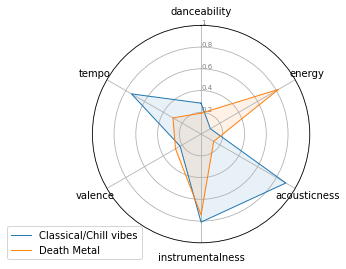

In [25]:
from math import pi

# Assign labels
scaled_audio_features.label[scaled_audio_features.label==0] = 'Classical/Chill vibes'
scaled_audio_features.label[scaled_audio_features.label==12] = 'Death Metal'

# Find centroids
cluster_positions = scaled_audio_features.drop(['dist_to_centroid', 'label'], axis=1).groupby(by="cluster").mean() 
cluster_positions

# ------- PART 1: Create background

# number of variables
categories = cluster_positions.columns.values.tolist()
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6,0.8,1], ["0.2","0.4","0.6","0.8","1"], color="grey", size=7)
plt.ylim(0,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 

# First genre
label_1 = 'Classical/Chill vibes'
label_cluster_1 = scaled_audio_features[scaled_audio_features.label==label_1].iloc[0].cluster

values=cluster_positions.loc[label_cluster_1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"{label_1}")
ax.fill(angles, values, alpha=0.1)

# Second genre
label_2 = 'Death Metal'
label_cluster_2 = scaled_audio_features[scaled_audio_features.label==label_2].iloc[0].cluster

values=cluster_positions.loc[label_cluster_2].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"{label_2}")
ax.fill(angles, values, alpha=0.1)
 
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.25, 0.1))

plt.savefig('Metal_vs_classical')

# Show the graph
plt.show()

